# Here I didn't create a test or validation set.  This is bad. Use the code in the iris example to:
- shuffle the data, use a random_state = 1
- select 60% of the data as a training set, 20% as a test set and 20% as a validation set.
- does it effect the score?
- what is the mean_squared_error then?

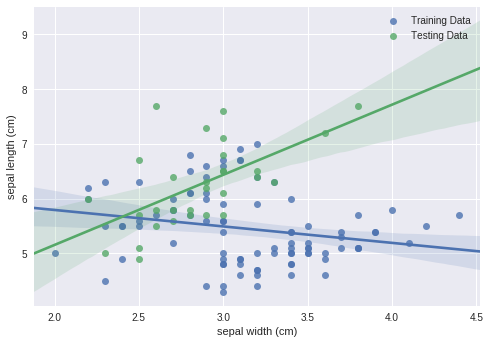


I am trying to predict sepal width from sepal length

The mean squared error for the linear regression developed from the original training set as applied to the test data is: 	0.6427
The mean squared error for the linear regression developed from the random training set as applied to the random test data is: 	0.4349

The r2 score for the linear regression developed from the original training set as applied to the test data is: 	-4.4254
The r2 score for the linear regression developed from the random training set as applied to the random test data is: 	-2.6716




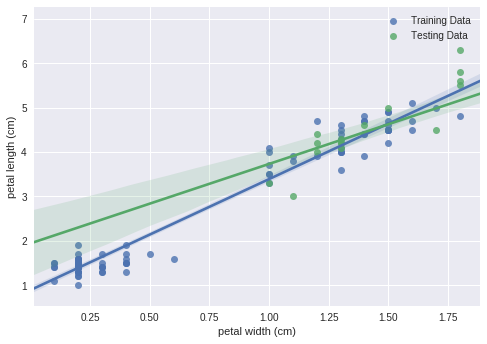


I am trying to predict petal width from petal length

The mean squared error for the linear regression developed from the original training set as applied to the test data is: 	12.9037
The mean squared error for the linear regression developed from the random training set as applied to the random test data is: 	1.9994

The r2 score for the linear regression developed from the original training set as applied to the test data is: 	-63.7489
The r2 score for the linear regression developed from the random training set as applied to the random test data is: 	-9.0325




In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Feb 10 12:57:55 2019

@author: matti
"""

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# loading the iris dataset, making it a pandas dataframe
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])

# generating non-random child dataframes
df_train = df.head(int(float(df.shape[0])*0.6))
df_ends = df.tail(int(float(df.shape[0])*0.4))
df_test = df_ends.head(int(df_ends.shape[0]/2))
df_valid = df_ends.tail(int(df_ends.shape[0]/2))

# making a randomized parent dataframe
df_r = df.sample(frac=1,random_state=1)

# splitting dataframe into train, test, and validation numpy arrays

################# Alyssa - I really like how you split the dataframe, makes it so you don't need to know the size of the original dataframe
df_train_r = df_r.head(int(float(df_r.shape[0])*0.6))
df_ends_r = df_r.tail(int(float(df_r.shape[0])*0.4))
df_test_r = df_ends.head(int(df_ends.shape[0]/2))
df_valid_r = df_ends.tail(int(df_ends.shape[0]/2))

# =============================================================================
 ### SCORING SEPAL WIDTH vs. SEPAL LENGTH ###
 
 # checking the regression plots for the training set
 
train_plt = sns.regplot(x='sepal width (cm)',y='sepal length (cm)',data=df_train,label='Training Data')
train_plt.legend(loc='best')
test_plt = sns.regplot(x='sepal width (cm)',y='sepal length (cm)',data=df_test,label='Testing Data')
test_plt.legend(loc='best')
plt.show()
 
regsep = LinearRegression()
regsep_r = LinearRegression()
seplen_train = df_train.values[:,[0]]
sepwid_train = df_train.values[:,[1]]
seplen_test = df_test.values[:,[0]]
sepwid_test = df_test.values[:,[1]]
seplen_train_r = df_train_r.values[:,[0]]
sepwid_train_r = df_train_r.values[:,[1]]
seplen_test_r = df_test_r.values[:,[0]]
sepwid_test_r = df_test_r.values[:,[1]]
 
regsep.fit(seplen_train,sepwid_train)
regsep_r.fit(seplen_train_r,sepwid_train_r)
 
sepwid_pred = regsep.predict(sepwid_test)
sepwid_pred_r = regsep_r.predict(sepwid_test_r)
 
msq = mean_squared_error(sepwid_test,sepwid_pred)
msq_r = mean_squared_error(sepwid_test_r,sepwid_pred_r)

r2 = r2_score(sepwid_test,sepwid_pred)
r2_r = r2_score(sepwid_test_r,sepwid_pred_r)
print('\nI am trying to predict sepal width from sepal length\n')
print("The mean squared error for the linear regression developed from the original training set as applied to the test data is: \t%s" %round(msq,ndigits=4))
print("The mean squared error for the linear regression developed from the random training set as applied to the random test data is: \t%s\n" %round(msq_r,ndigits=4))

print("The r2 score for the linear regression developed from the original training set as applied to the test data is: \t%s" %round(r2,ndigits=4))
print("The r2 score for the linear regression developed from the random training set as applied to the random test data is: \t%s\n\n" %round(r2_r,ndigits=4))
# =============================================================================

# =============================================================================
 ### SCORING SEPAL WIDTH vs. SEPAL LENGTH ###
 
 # checking the regression plots for the training set
 
pet_train_plt = sns.regplot(x='petal width (cm)',y='petal length (cm)',data=df_train,label='Training Data')
pet_train_plt.legend(loc='best')
pet_test_plt = sns.regplot(x='petal width (cm)',y='petal length (cm)',data=df_test,label='Testing Data')
pet_test_plt.legend(loc='best')
plt.show()
 
regpet = LinearRegression()
regpet_r = LinearRegression()
petlen_train = df_train.values[:,[0]]
petwid_train = df_train.values[:,[3]]
petlen_test = df_test.values[:,[2]]
petwid_test = df_test.values[:,[3]]
petlen_train_r = df_train_r.values[:,[2]]
petwid_train_r = df_train_r.values[:,[3]]
petlen_test_r = df_test_r.values[:,[2]]
petwid_test_r = df_test_r.values[:,[3]]
 
regpet.fit(petlen_train,petwid_train)
regpet_r.fit(petlen_train_r,petwid_train_r)
 
petwid_pred = regpet.predict(petwid_test)
petwid_pred_r = regpet_r.predict(petwid_test_r)
 
pet_msq = mean_squared_error(petwid_test,petwid_pred)
pet_msq_r = mean_squared_error(petwid_test_r,petwid_pred_r)
 
pet_r2 = r2_score(petwid_test,petwid_pred)
pet_r2_r = r2_score(petwid_test_r,petwid_pred_r)
print('\nI am trying to predict petal width from petal length\n')
print("The mean squared error for the linear regression developed from the original training set as applied to the test data is: \t%s" %round(pet_msq,ndigits=4))
print("The mean squared error for the linear regression developed from the random training set as applied to the random test data is: \t%s\n" %round(pet_msq_r,ndigits=4))
 
print("The r2 score for the linear regression developed from the original training set as applied to the test data is: \t%s" %round(pet_r2,ndigits=4))
print("The r2 score for the linear regression developed from the random training set as applied to the random test data is: \t%s\n\n" %round(pet_r2_r,ndigits=4))
# =============================================================================

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Sun Feb 17 19:45:44 2019

@author: matti
"""

import pandas as pd
from sklearn import datasets
from sklearn.metrics import mean_squared_error as msq
from matplotlib import pyplot
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# pulling in boston data
data = datasets.load_boston()

# making dataframe and randomized dataframe
df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
df_r = df.sample(frac=1).reset_index(drop=True)

# finding length of dataframe
size = df.shape[0]

# selecting slices of dataframes for training, testing, and validating
df_train = df.loc[:round(size*0.6)]
df_test = df.loc[round(size*0.6):round(size*0.8)]
df_valid = df.loc[round(size*0.8):]
df_r_train = df_r.loc[:round(size*0.6)]
df_r_test = df_r.loc[round(size*0.6):round(size*0.8)]
df_r_valid = df_r.loc[round(size*0.8):]

# doing linear regression for both sets of data
lr = LinearRegression()
X = df_train[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = df_train['target']
lr.normalize=False
lr.fit(X,y)

lr_r = LinearRegression()
X_r = df_r_train[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y_r = df_r_train['target']
lr_r.normalize=False
lr_r.fit(X_r,y_r)

# getting r^2 score
df_score = lr.score(X,y)
df_r_score = lr_r.score(X_r,y_r)
# RESULT: on several runs, found that the randomized score is continually closer to zero than the original score
# this indicates that the regression created from the random data was worse than the regression created from the original data

# getting mean squared errors
lr_msq = msq(y,lr.predict(X))
lr_r_msq = msq(y_r,lr_r.predict(X_r))
# RESULT: after several runs, it was discovered that the msq for the random set was consistently greater than for the original set
# this indicates that the regression created from the random data was worse than the regression created from the original data

The results obtained from this analysis is that the regression that was obtained using the randomized data was consistently worse than the regression obtained from the original data set. This indicates that the original data set was organized in some way so as to homogenize the characteristics in particular section of the list, allowing for a better fit to that slice of data.

In [3]:
X_r.__class__

pandas.core.frame.DataFrame

# Note that many of the values were significantally out of scale in the box plots, i.e. TAX.
- How might you go about "normalizing" the data?
- Do you think this will improve or degrade the qualify of your regressor?
- ** Try to implement it

Since all the numbers are positive, for each column I would divide all the values in the column by the maximum value in the column. The resulting series of data would be the data normalized from 0 to 1.

This will not degrade the quality of the regressor.

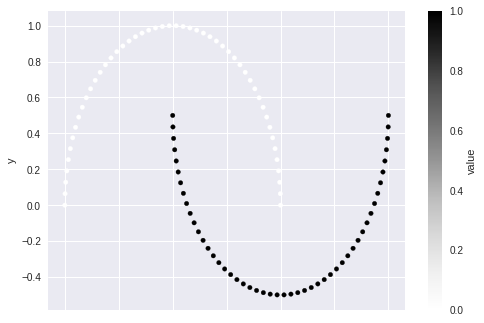

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

df = datasets.make_moons()

# upon investigation, it was determined the make_moons data set is a 
# tuple of size 2, where the first element is a numpy.ndarray of 
# cartesion coordinates, and the second element is a numpy.ndarray of
# binary values

# creating a list from the second element in the tuple
val = list(df[1])

# setting up empty lists for the cartesian coordinates
x_lst = []
y_lst = []

# looping through the first element to pull x and y values
for a in df[0]:
    x_lst = x_lst + [a[0]]
    y_lst = y_lst + [a[1]]

datas = pd.DataFrame(data=[x_lst,y_lst,val]).transpose()
datas.columns = ['x','y','value']

# the make_moons dataset has been translated to a pandas dataframe

datas.plot.scatter(x='x',y='y',c='value')

The r^2 score for the logistic regression on the training dataset for make_moons is:  0.4753
The mean squared error for the logistic regression on the training dataset for make_moons is:  0.1311


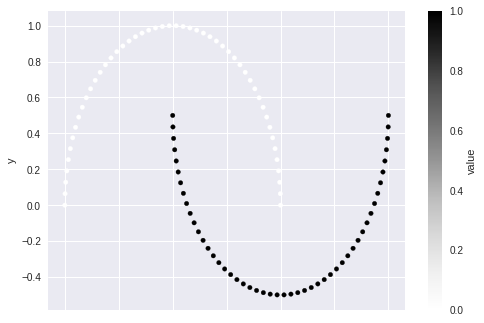

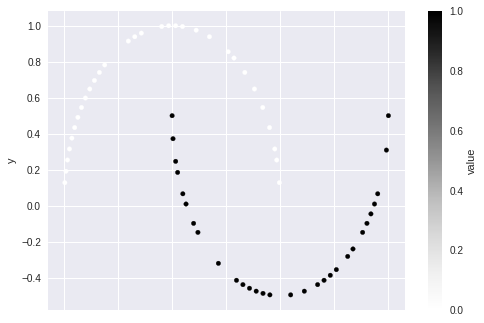

In [12]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 18 22:10:22 2019

@author: matti
"""

# =============================================================================
# •	Create a dataframe using datasets.make_moons()
# •	Use a scatter plot to look at the data (use different colors for the classes)
# •	train a logistic regession model on the data set.
# •	how does it do? can you make it perform better?
# =============================================================================

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error as msq, r2_score as r2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-darkgrid')

df = datasets.make_moons()

# upon investigation, it was determined the make_moons data set is a 
# tuple of size 2, where the first element is a numpy.ndarray of 
# cartesion coordinates, and the second element is a numpy.ndarray of
# binary values

# creating a list from the second element in the tuple
val = list(df[1])

# setting up empty lists for the cartesian coordinates
x_lst = []
y_lst = []

# looping through the first element to pull x and y values
for a in df[0]:
    x_lst = x_lst + [a[0]]
    y_lst = y_lst + [a[1]]

datas = pd.DataFrame(data=[x_lst,y_lst,val]).transpose()
datas.columns = ['x','y','value']

# the make_moons dataset has been translated to a pandas dataframe

# now I will check the scatter plot of the entire dataset
datas.plot.scatter(x='x',y='y',c='value')

# need to break up the data into training, testing, and validating dataframes
size = datas.shape[0]

df_train = datas.loc[:round(size*0.6)]
df_test = datas.loc[round(size*0.6):round(size*0.8)]
df_valid = datas.loc[round(size*0.8):]

#creating a copy to use later
df_train2 = datas.loc[:round(size*0.6)]
df_test2 = datas.loc[round(size*0.6):round(size*0.8)]

# now I will check the scatter plot of the training dataset
df_train.plot.scatter(x='x',y='y',c='value')
# the original dataset appears to have been shuffled

lr = LogisticRegression()

X = df_train[['x','y']]
y = df_train['value']

lr.fit(X,y)

df_score = lr.score(X,y)
lr_msq = msq(y,lr.predict(X))
lr_r2 = r2(y,lr.predict(X))

print('The r^2 score for the logistic regression on the training dataset for make_moons is: ',round(lr_r2,ndigits=4))
print('The mean squared error for the logistic regression on the training dataset for make_moons is: ',round(lr_msq,ndigits=4))

# RESULT: after numerous runs, it was found that the r^2 score was usually on the range of 0.83 - 0.86
#           additionally, the mean squared error was found to range from 0.10 - 0.15
# Upon investigation, it was found that this variation exists in the variability of the fitting each time

In [13]:
# in order to determine if our regression worked properly, we can attempt to classify the datasets using this regression
print(sum(lr.predict(df_train.drop('value', axis=1))==df_train['value']))
print(sum(lr.predict(df_test.drop('value', axis=1))==df_test['value']))

# over several runs, it looks like the regression can correctly classify about 52-53 of 
# the training rows, and about 18-19 of the test rows

# let's add more columns of various mathematical relationships between x and y to get more fidelity on our inputs


df_train2['sum'] = df_train2['x'] + df_train2['y']
df_train2['diff'] = df_train2['x'] - df_train2['y']
df_train2['product'] = df_train2['x'] * df_train2['y']
df_test2['sum'] = df_test2['x'] + df_test2['y']
df_test2['diff'] = df_test2['x'] - df_test2['y']
df_test2['product'] = df_test2['x'] * df_test2['y']


lr2 = LogisticRegression()

X2 = df_train2[['x','y']]
y2 = df_train2['value']

lr2.fit(X2,y2)

print(sum(lr2.predict(df_train.drop('value', axis=1))==df_train['value']))
print(sum(lr2.predict(df_test.drop('value', axis=1))==df_test['value']))

53
15


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

53
15


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

No matter how many times I run the code above, I still receive the same proportion of successful classifications for both the original dataframe and the dataframe with the additional columns...

I do not know how to make this better, I will allocate my resources to solving the next homework assignment.